In [99]:
#Netflix_Data_Analysis

In [7]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [9]:
#Read the file into the dataframe
df = pd.read_csv(r'C:\Users\14695\OneDrive\Desktop\Netflix_data_analysis(sql &python).csv', encoding='unicode_escape')

In [10]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [12]:
df.shape

(8790, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [19]:
# Save the DataFrame to an SQLite database
df.to_sql(name='Netflix', con=connection, index=False, if_exists='replace')

8790

In [32]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
database_path = r'C:\Users\14695\OneDrive\Desktop\python_projects\travel.sqlite'
connection = sqlite3.connect(database_path)
cursor = connection.cursor()

# Execute SQL query to fetch all data from the specified table
query = "SELECT * FROM Netflix"
df_from_sql = pd.read_sql_query(query, connection)

# Display the DataFrame
df_from_sql

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [33]:
df_from_sql.count()

show_id         8790
type            8790
title           8790
director        8790
country         8790
date_added      8790
release_year    8790
rating          8790
duration        8790
listed_in       8790
dtype: int64

In [28]:
#The show_id column is the unique id for the dataset, therefore we are going to check for duplicates
import sqlite3
import pandas as pd

# Connect to the SQLite database
database_path = r'C:\Users\14695\OneDrive\Desktop\python_projects\travel.sqlite'
connection = sqlite3.connect(database_path)
cursor = connection.cursor()

# Execute SQL query to fetch all data from the specified table
query = """
    SELECT show_id, COUNT(*) as Count 
    FROM Netflix 
    GROUP BY show_id 
    ORDER BY show_id DESC
"""

# Use pd.read_sql_query to execute the query and fetch the results into a DataFrame
df_from_sql = pd.read_sql_query(query, connection)

# Display the DataFrame
df_from_sql


,show_id,Count
0,s999,1
1,s998,1
2,s997,1
3,s996,1
4,s995,1
...,...,...
8785,s1001,1
8786,s1000,1
8787,s100,1
8788,s10,1


In [42]:
#To Check null values across columns
import sqlite3
import pandas as pd

# Connect to the SQLite database
database_path = r'C:\Users\14695\OneDrive\Desktop\python_projects\travel.sqlite'
connection = sqlite3.connect(database_path)
cursor = connection.cursor()

# Execute SQL query to fetch counts of NULL values for each column
query = """
    SELECT 
        COUNT(*) FILTER(WHERE show_id IS NULL) AS showid_nulls,
        COUNT(*) FILTER(WHERE type IS NULL) AS type_nulls,
        COUNT(*) FILTER(WHERE title IS NULL) AS title_nulls,
        COUNT(*) FILTER(WHERE director IS NULL) AS director_nulls,
        COUNT(*) FILTER(WHERE country IS NULL) AS country_nulls,
        COUNT(*) FILTER(WHERE date_added IS NULL) AS date_addes_nulls,
        COUNT(*) FILTER(WHERE release_year IS NULL) AS release_year_nulls,
        COUNT(*) FILTER(WHERE rating IS NULL) AS rating_nulls,
        COUNT(*) FILTER(WHERE duration IS NULL) AS duration_nulls,
        COUNT(*) FILTER(WHERE listed_in IS NULL) AS listed_in_nulls
    FROM Netflix
"""

# Use pd.read_sql_query to execute the query and fetch the results into a DataFrame
df_from_sql = pd.read_sql_query(query, connection)

# Display the DataFrame
df_from_sql

,showid_nulls,type_nulls,title_nulls,director_nulls,country_nulls,date_addes_nulls,release_year_nulls,rating_nulls,duration_nulls,listed_in_nulls
0,0,0,0,0,0,0,0,0,0,0


In [52]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
database_path = r'C:\Users\14695\OneDrive\Desktop\python_projects\travel.sqlite'
connection = sqlite3.connect(database_path)
cursor = connection.cursor()

# Execute SQL query to fetch counts of TV shows
query = """
    SELECT COUNT(type) AS Count_of_TVshows FROM Netflix WHERE type = "TV Show"
"""

# Use pd.read_sql_query to execute the query and fetch the results into a DataFrame
df_from_sql = pd.read_sql_query(query, connection)

# Extract the count of TV shows from the DataFrame
count_of_tv_shows = df_from_sql['Count_of_TVshows'][0]

# Calculate the total count of rows in the 'Netflix' table
total_count_query = "SELECT COUNT(*) AS total_count FROM Netflix"
total_count_result = pd.read_sql_query(total_count_query, connection)
total_count = total_count_result['total_count'][0]

# Calculate the percentage
percentage_tv_shows = (count_of_tv_shows / total_count) * 100

# Display the result
print(f"Percentage of TV Shows: {percentage_tv_shows:.2f}%")

Percentage of TV Shows: 30.31%


In [53]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
database_path = r'C:\Users\14695\OneDrive\Desktop\python_projects\travel.sqlite'
connection = sqlite3.connect(database_path)
cursor = connection.cursor()

# Execute SQL query to fetch counts of movies
query = """
    SELECT COUNT(type) AS Count_of_Movies FROM Netflix WHERE type = "Movie"
"""

# Use pd.read_sql_query to execute the query and fetch the results into a DataFrame
df_from_sql = pd.read_sql_query(query, connection)

# Extract the count of movies from the DataFrame
count_of_movies = df_from_sql['Count_of_Movies'][0]

# Calculate the total count of rows in the 'Netflix' table
total_count_query = "SELECT COUNT(*) AS total_count FROM Netflix"
total_count_result = pd.read_sql_query(total_count_query, connection)
total_count = total_count_result['total_count'][0]

# Calculate the percentage of movies
percentage_movies = (count_of_movies / total_count) * 100

# Display the result
print(f"Percentage of Movies: {percentage_movies:.2f}%")

Percentage of Movies: 69.69%


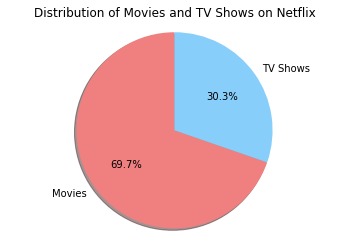

In [56]:
import matplotlib.pyplot as plt

# Pie chart to plot the percentage of movies and Tv shows on Netflix
labels = ['Movies', 'TV Shows']
sizes = [percentage_movies, percentage_tv_shows]
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.show()


Observation: From the above observation it is understood that Movies cover the highest percentage on Netflix i.e 69.7%.

In [61]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
database_path = r'C:\Users\14695\OneDrive\Desktop\python_projects\travel.sqlite'
connection = sqlite3.connect(database_path)
cursor = connection.cursor()

# Execute SQL query to fetch the top 10 countries by show count
query = """
    SELECT country, COUNT(*) AS show_count
    FROM Netflix
    WHERE country IS NOT NULL
    GROUP BY country
    ORDER BY show_count DESC
    LIMIT 16
"""

# Use pd.read_sql_query to execute the query and fetch the results into a DataFrame
df_top_countries = pd.read_sql_query(query, connection)

# Display the DataFrame
print(df_top_countries)


           country  show_count
0    United States        3240
1            India        1057
2   United Kingdom         638
3         Pakistan         421
4        Not Given         287
5           Canada         271
6            Japan         259
7      South Korea         214
8           France         213
9            Spain         182
10          Mexico         138
11           Egypt         123
12       Australia         114
13          Turkey         112
14         Nigeria         105
15         Germany         104


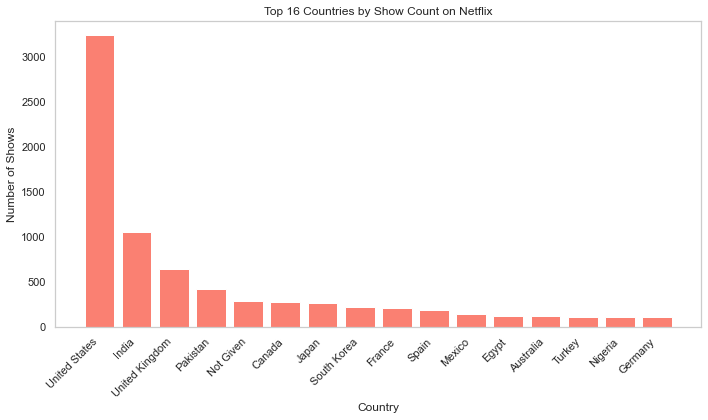

In [117]:
# Plotting 
plt.figure(figsize=(10, 6))
plt.bar(df_top_countries['country'], df_top_countries['show_count'], color='salmon')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.title('Top 16 Countries by Show Count on Netflix')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid(False)
plt.show()

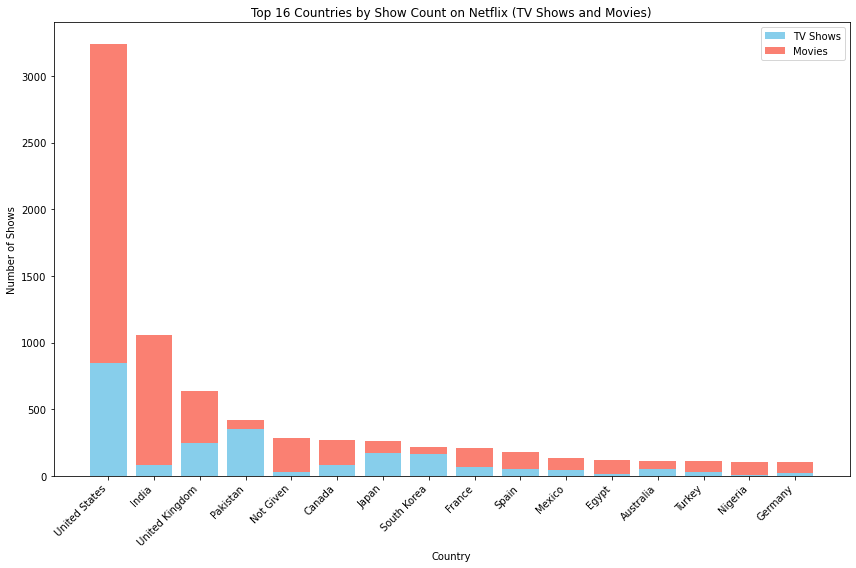

In [67]:
# Code to represent the total amount of Movies and Tv shows by country 
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
database_path = r'C:\Users\14695\OneDrive\Desktop\python_projects\travel.sqlite'
connection = sqlite3.connect(database_path)
cursor = connection.cursor()

# Execute SQL query to fetch the top 16 countries by show count for both TV shows and movies
query = """
    SELECT country, 
           COUNT(CASE WHEN type = 'TV Show' THEN 1 END) AS tv_show_count,
           COUNT(CASE WHEN type = 'Movie' THEN 1 END) AS movie_count
    FROM Netflix
    WHERE country IS NOT NULL
    GROUP BY country
    ORDER BY (tv_show_count + movie_count) DESC
    LIMIT 16
"""

# Use pd.read_sql_query to execute the query and fetch the results into a DataFrame
df_top_countries_both = pd.read_sql_query(query, connection)

# Plotting
plt.figure(figsize=(12, 8))

# Bar chart with stacked bars
plt.bar(df_top_countries_both['country'], df_top_countries_both['tv_show_count'], label='TV Shows', color='skyblue')
plt.bar(df_top_countries_both['country'], df_top_countries_both['movie_count'], label='Movies', color='salmon', bottom=df_top_countries_both['tv_show_count'])

plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.title('Top 16 Countries by Show Count on Netflix (TV Shows and Movies)')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


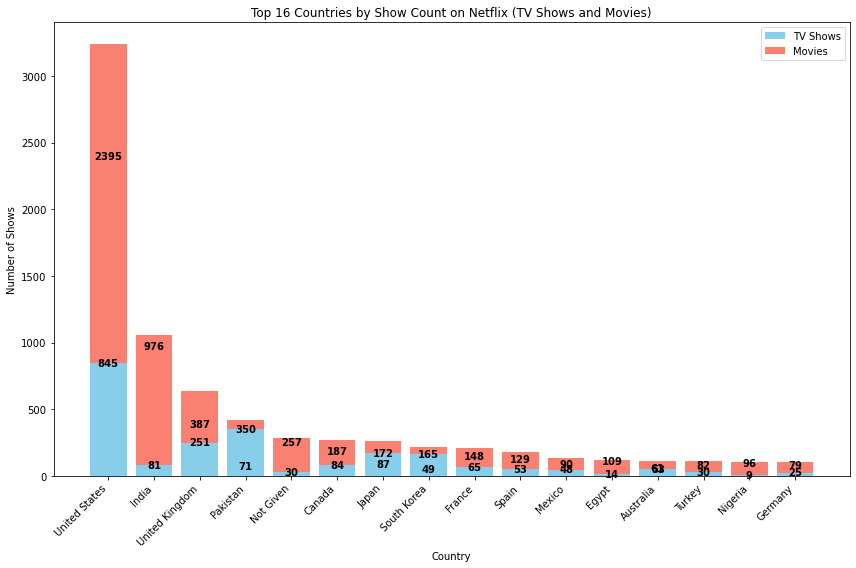

In [73]:
# Plotting
plt.figure(figsize=(12, 8))

# Bar chart with stacked bars
bars1 = plt.bar(df_top_countries_both['country'], df_top_countries_both['tv_show_count'], label='TV Shows', color='skyblue')
bars2 = plt.bar(df_top_countries_both['country'], df_top_countries_both['movie_count'], label='Movies', color='salmon', bottom=df_top_countries_both['tv_show_count'])

# to add annotations with better spacing
for bars, label in zip([bars1, bars2], ['TV Shows', 'Movies']):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, f'{yval}', ha='center', va='center', color='black', fontweight='bold', fontsize=10)

plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.title('Top 16 Countries by Show Count on Netflix (TV Shows and Movies)')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Observation: 
1)From the above figures it is clear that United states has highest number of shows on Netflix.
2)The count of Movies is higher than that of Tv shows in majority of countries.

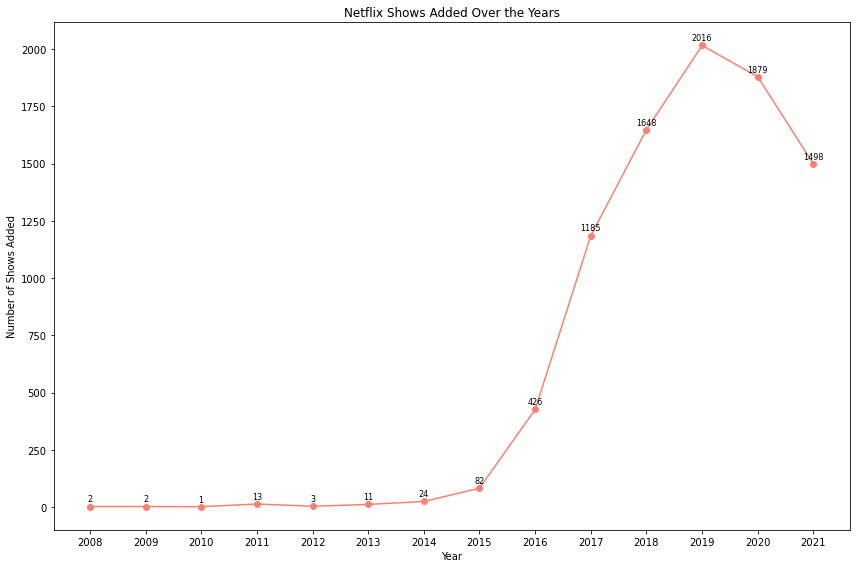

In [85]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
database_path = r'C:\Users\14695\OneDrive\Desktop\python_projects\travel.sqlite'
connection = sqlite3.connect(database_path)
cursor = connection.cursor()

# Execute SQL query to fetch the count of shows added each year
query = """
    SELECT SUBSTR(date_added, -4) AS year_added, COUNT(*) AS show_count
    FROM Netflix
    WHERE date_added IS NOT NULL
    GROUP BY year_added
    ORDER BY year_added
"""

# Use pd.read_sql_query to execute the query and fetch the results into a DataFrame
df_shows_added_per_year = pd.read_sql_query(query, connection)

# Plotting
plt.figure(figsize=(12, 8))

# Line chart
plt.plot(df_shows_added_per_year['year_added'], df_shows_added_per_year['show_count'], marker='o', linestyle='-', color='salmon')

# to add annotations with numbers on the graph
for i, count in enumerate(df_shows_added_per_year['show_count']):
    plt.annotate(f'{count}', (df_shows_added_per_year['year_added'][i], count),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='black')

plt.xlabel('Year')
plt.ylabel('Number of Shows Added')
plt.title('Netflix Shows Added Over the Years')
plt.tight_layout()
plt.show()

Observation:
1)This time series chart shows the total number of contents added to Netflix all through the given years (2008 - 2021).
2)It shows that most movies and tv shows on Netflix were added in 2019.

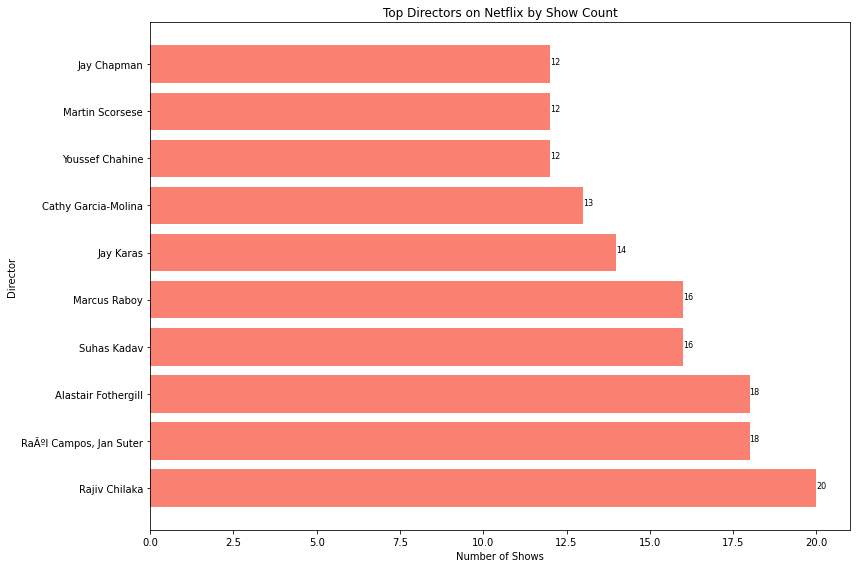

In [100]:
#Code to view the top 10 directors 
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
database_path = r'C:\Users\14695\OneDrive\Desktop\python_projects\travel.sqlite'
connection = sqlite3.connect(database_path)
cursor = connection.cursor()

# Execute SQL query to fetch the top directors by show count 
query = """
    WITH TopDirectors AS (
        SELECT director, COUNT(*) AS show_count
        FROM Netflix
        WHERE director IS NOT NULL
        GROUP BY director
        ORDER BY show_count DESC
        LIMIT 11  -- Limit set to 11 to include top 10 and 1 more for exclusion
    )
    SELECT * FROM TopDirectors
    WHERE director != (SELECT director FROM TopDirectors ORDER BY show_count DESC LIMIT 1)
"""

# Use pd.read_sql_query to execute the query and fetch the results into a DataFrame
df_top_directors = pd.read_sql_query(query, connection)

# Plotting
plt.figure(figsize=(12, 8))

# Horizontal bar chart for top directors 
plt.barh(df_top_directors['director'], df_top_directors['show_count'], color='salmon')

# Add annotations with numbers on the graph
for i, count in enumerate(df_top_directors['show_count']):
    plt.annotate(f'{count}', (count, i), textcoords="offset points", xytext=(5, 0), ha='center', fontsize=8, color='black')

plt.xlabel('Number of Shows')
plt.ylabel('Director')
plt.title('Top Directors on Netflix by Show Count')
plt.tight_layout()
plt.show()

Observation:
1)The chart shows the top 10 directors with most contents on Netflix.
2)Rajiv Chilaka is the top director with most shows on Netflix.
3)We can also note that the duo of Raul Campos and Jan Suter are fond of working together and have directed 18 movies on Netflix.

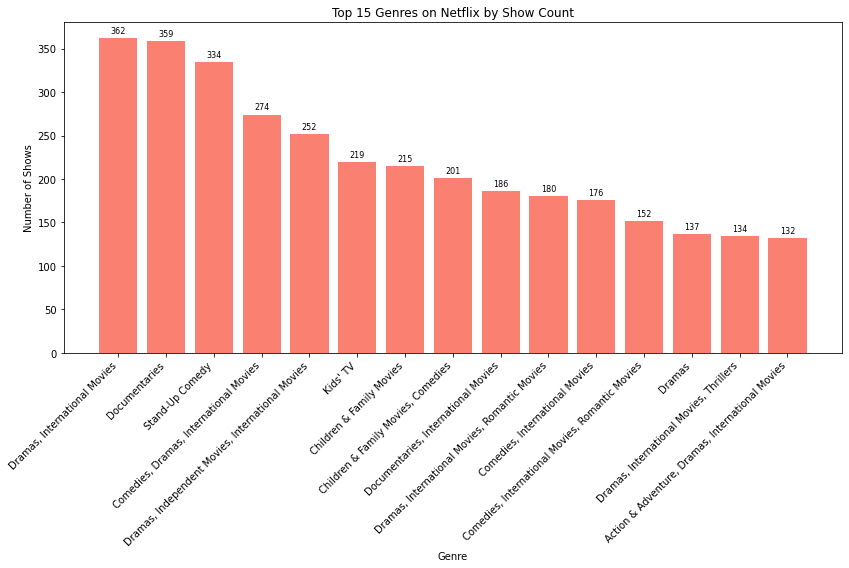

In [101]:
#Code to view the top 15 Genres
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
database_path = r'C:\Users\14695\OneDrive\Desktop\python_projects\travel.sqlite'
connection = sqlite3.connect(database_path)
cursor = connection.cursor()

# Execute SQL query to fetch the top 15 genres by show count
query = """
    SELECT listed_in AS genre, COUNT(*) AS show_count
    FROM Netflix
    WHERE listed_in IS NOT NULL
    GROUP BY listed_in
    ORDER BY show_count DESC
    LIMIT 15
"""

# Use pd.read_sql_query to execute the query and fetch the results into a DataFrame
df_top_genres = pd.read_sql_query(query, connection)

# Plotting
plt.figure(figsize=(12, 8))

# Bar chart for top 15 genres
plt.bar(df_top_genres['genre'], df_top_genres['show_count'], color='salmon')

# Add annotations with numbers on the graph
for i, count in enumerate(df_top_genres['show_count']):
    plt.annotate(f'{count}', (i, count), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='black')

plt.xlabel('Genre')
plt.ylabel('Number of Shows')
plt.title('Top 15 Genres on Netflix by Show Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Observation:
1)The chart shows the genres with the highest numbers on Netflix.
2)We can see that Drama & International movies followed by Documentary have the highest number of contents on Netflix within the period.

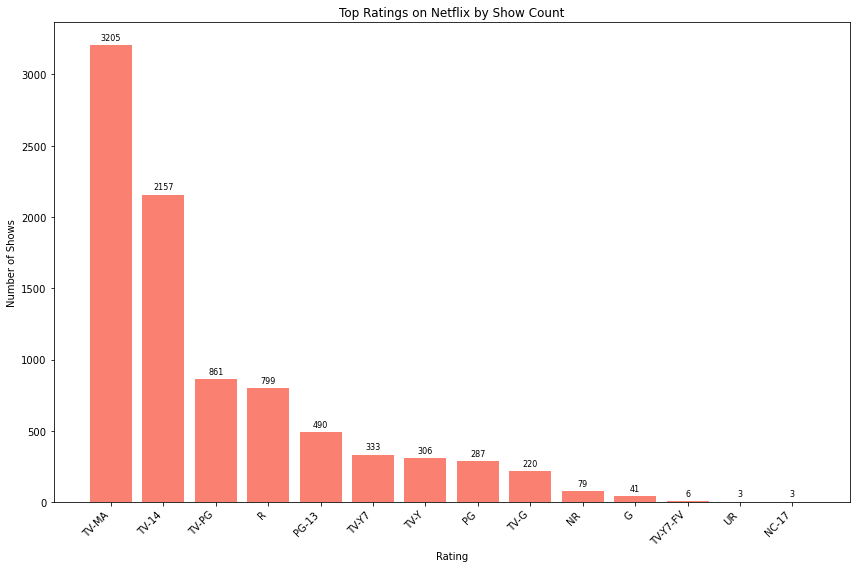

In [92]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
database_path = r'C:\Users\14695\OneDrive\Desktop\python_projects\travel.sqlite'
connection = sqlite3.connect(database_path)
cursor = connection.cursor()

# Execute SQL query to fetch the top ratings and their counts
query = """
    SELECT rating, COUNT(*) AS show_count
    FROM Netflix
    WHERE rating IS NOT NULL
    GROUP BY rating
    ORDER BY show_count DESC
"""

# Use pd.read_sql_query to execute the query and fetch the results into a DataFrame
df_top_ratings = pd.read_sql_query(query, connection)

# Plotting
plt.figure(figsize=(12, 8))

# Bar chart for top ratings
plt.bar(df_top_ratings['rating'], df_top_ratings['show_count'], color='salmon')

# Add annotations with numbers on the graph
for i, count in enumerate(df_top_ratings['show_count']):
    plt.annotate(f'{count}', (i, count), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='black')

plt.xlabel('Rating')
plt.ylabel('Number of Shows')
plt.title('Top Ratings on Netflix by Show Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Observation:
The chart shows the top ratings on Netflix
We can note that most contents on Netflix are rated TV-MA. 
TV-MA in the United States by the TV Parental Guidelines signifies content for mature audiences.

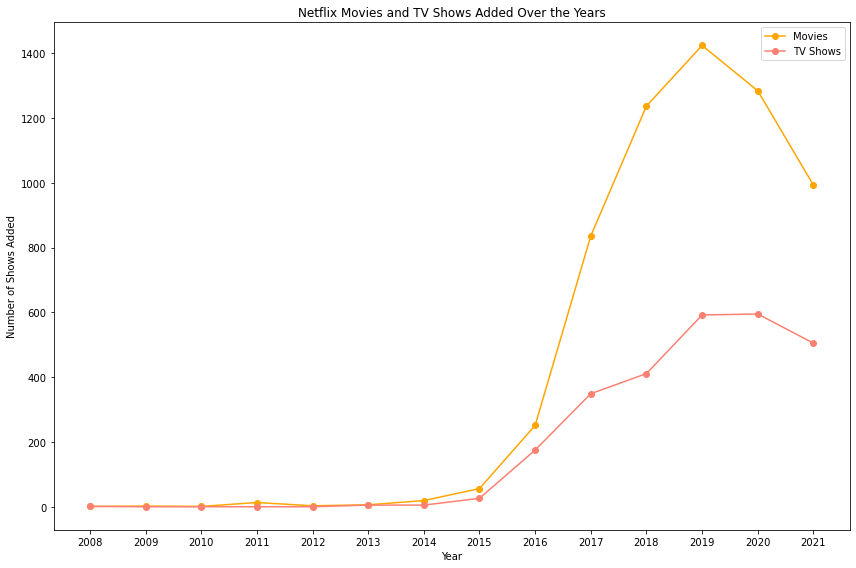

In [94]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
database_path = r'C:\Users\14695\OneDrive\Desktop\python_projects\travel.sqlite'
connection = sqlite3.connect(database_path)
cursor = connection.cursor()

# Execute SQL query to fetch the count of movies and TV shows added each year
query = """
    SELECT SUBSTR(date_added, -4) AS year_added, 
           COUNT(CASE WHEN type = 'Movie' THEN 1 END) AS movie_count,
           COUNT(CASE WHEN type = 'TV Show' THEN 1 END) AS tv_show_count
    FROM Netflix
    WHERE date_added IS NOT NULL
    GROUP BY year_added
    ORDER BY year_added
"""

# Use pd.read_sql_query to execute the query and fetch the results into a DataFrame
df_added_per_year = pd.read_sql_query(query, connection)

# Plotting
plt.figure(figsize=(12, 8))

# Line chart for movies added per year
plt.plot(df_added_per_year['year_added'], df_added_per_year['movie_count'], marker='o', label='Movies', linestyle='-', color='orange')

# Line chart for TV shows added per year
plt.plot(df_added_per_year['year_added'], df_added_per_year['tv_show_count'], marker='o', label='TV Shows', linestyle='-', color='salmon')

plt.xlabel('Year')
plt.ylabel('Number of Shows Added')
plt.title('Netflix Movies and TV Shows Added Over the Years')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

Observation:
1)This line chart compares the Movie and Tv shows contents added to Netflix all through the years.
2)We can see that more movies have always been added and most movies and tv shows on Netflix were added in 2019.
3)In 2013, the number of contents added to Netflix for both were almost the same with Movies having 6 contents that year and Tv shows having 5.
4)It shows that in the first 5 years, only movies were added to Netflix.

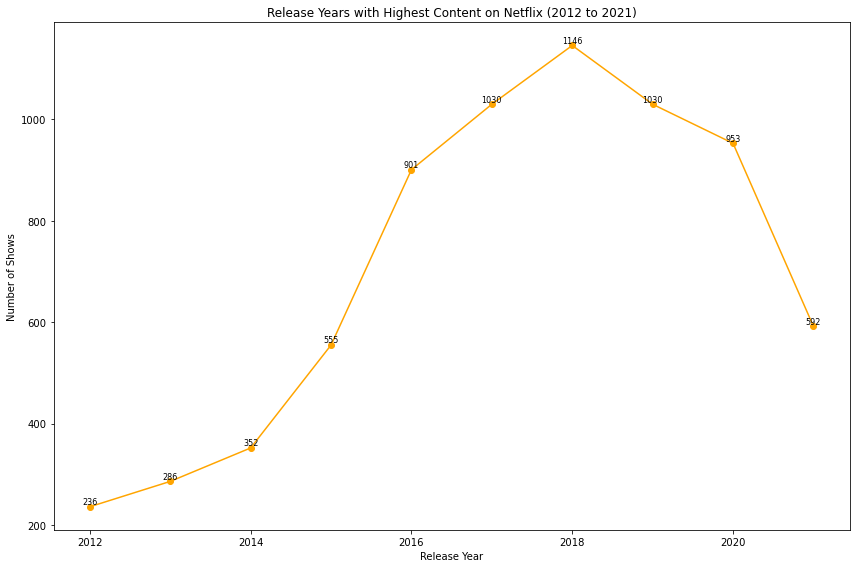

In [98]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
database_path = r'C:\Users\14695\OneDrive\Desktop\python_projects\travel.sqlite'
connection = sqlite3.connect(database_path)
cursor = connection.cursor()

# Execute SQL query to fetch the release years and their counts for the years 2012 to 2021
query = """
    SELECT release_year, COUNT(*) AS show_count
    FROM Netflix
    WHERE release_year IS NOT NULL AND release_year BETWEEN 2012 AND 2021
    GROUP BY release_year
    ORDER BY release_year
"""

# Use pd.read_sql_query to execute the query and fetch the results into a DataFrame
df_top_release_years = pd.read_sql_query(query, connection)

# Plotting
plt.figure(figsize=(12, 8))

# Line chart for release years with highest content (2012 to 2021)
plt.plot(df_top_release_years['release_year'], df_top_release_years['show_count'], marker='o', linestyle='-', color='orange')

# Add annotations with numbers on the graph
for i, count in enumerate(df_top_release_years['show_count']):
    plt.text(df_top_release_years['release_year'][i], count + 5, str(count),
             ha='center', fontsize=8, color='black')

plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.title('Release Years with Highest Content on Netflix (2012 to 2021)')
plt.grid(False)
plt.tight_layout()
plt.show()


Observation:
1)This chart shows the Movies and Tv shows production year which has highest contents on Netflix. 
2)We focus on the top 10 release year/production year.
3)We can see that from 2012 to 2018, Netflix added most recent contents, they made sure most recent contents per release year are higher than the older release year contents. 
4)Then in 2019, it started dropping, this may be due to the Covid-19, but further analysis may be needed to determine this.